In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/store/hust/computer vision/bai tap/4'

/content/drive/MyDrive/Colab Notebooks/store/hust/computer vision/bai tap/4


In [4]:
import cv2
import numpy as np

(-0.5, 2249.5, 3999.5, -0.5)

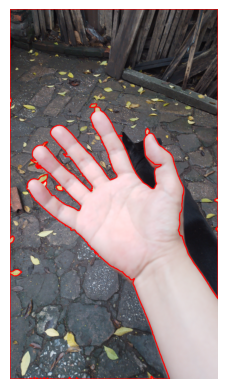

In [5]:
img = cv2.imread('hand.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, b_img = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(b_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.imread('hand.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(rgb_img, [largest_contour], 0, (255,0,0), 10)
plt.imshow(rgb_img )
plt.axis('off')



In [6]:
img = cv2.imread('hand.jpg')

In [21]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

(-0.5, 2249.5, 3999.5, -0.5)

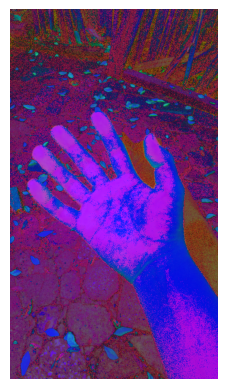

In [22]:
import matplotlib.pyplot as plt
plt.imshow(hsv_img)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

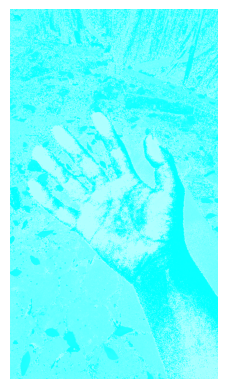

In [36]:
# xóa phụ thuộc ánh sáng V và phục thuôc độ tươi S
cleaned_img = hsv_img.copy()
cleaned_img[:, :, 2] = 255
cleaned_img[:, :, 1] = 255
plt.imshow(cleaned_img)
plt.axis('off')

In [ ]:
cleaned_img

(-0.5, 2249.5, 3999.5, -0.5)

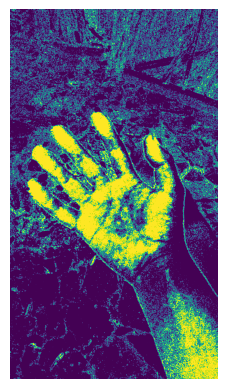

In [48]:
# Định nghĩa trần và sàn màu sắc của da người
# define the lower and upper HSV boundaries for the skin
cleaned_lower = np.array([150, 255, 255 ], dtype='uint8')
cleaned_upper = np.array([190, 255, 255 ], dtype='uint8')

# tạo 1 cái mặt nạ để cô lập những điểm ảnh trong khoảng màu da ở trên
cleaned_mask = cv2.inRange(cleaned_img, cleaned_lower, cleaned_upper)
plt.imshow(cleaned_mask)
plt.axis('off')

In [30]:
# Định nghĩa trần và sàn màu sắc của da người
# define the lower and upper HSV boundaries for the skin
hsv_lower = np.array([0, 40, 80 ], dtype='uint8')
hsv_upper = np.array([20, 255, 255 ], dtype='uint8')

(-0.5, 2249.5, 3999.5, -0.5)

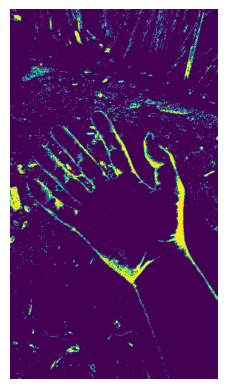

In [33]:
# tạo 1 cái mặt nạ để cô lập những điểm ảnh trong khoảng màu da ở trên
mask = cv2.inRange(hsv_img, hsv_lower, hsv_upper)
plt.imshow(mask)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

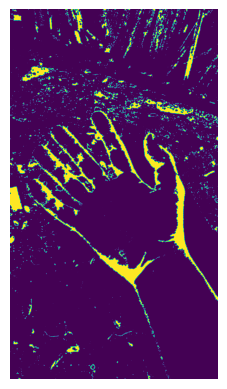

In [11]:
# cải thiện mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

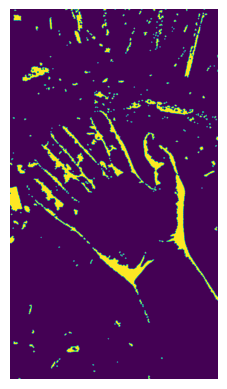

In [12]:
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(mask)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

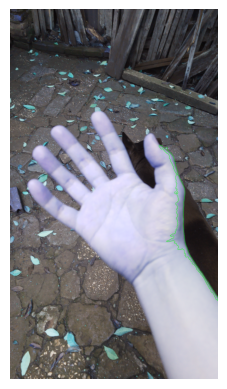

In [13]:
# lấy viền contour
contour, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.imread('hand.jpg')
largest_contour = max(contour, key=cv2.contourArea)
altered_img = cv2.drawContours(img, [largest_contour], 0, (0,255,0), 2)
plt.imshow(img )
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

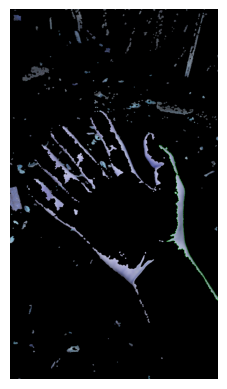

In [14]:
# cô lập hóa khu vục bàn tay
region = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(region)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

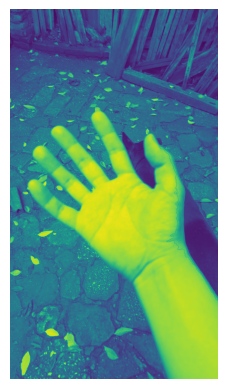

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

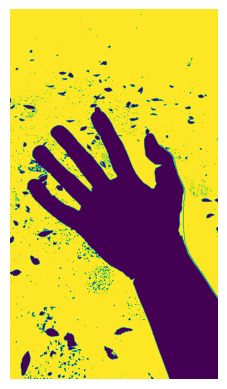

In [16]:
thresh, b_img = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)
plt.imshow(b_img)
plt.axis('off')

(-0.5, 2249.5, 3999.5, -0.5)

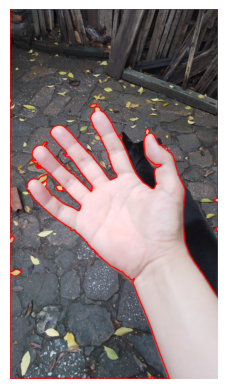

In [17]:
contours, _ = cv2.findContours(b_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.imread('hand.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(rgb_img, [largest_contour], 0, (255,0,0), 10)
plt.imshow(rgb_img )
plt.axis('off')

<ipython-input-18-b0b4b015e169>:6: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 400 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  hsv_upper = np.array([400, 20, 110 ], dtype='uint8')


(-0.5, 2249.5, 3999.5, -0.5)

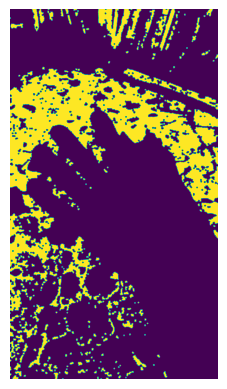

In [18]:
img = cv2.imread('hand.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hsv_lower = np.array([0, 10, 70 ], dtype='uint8')
hsv_upper = np.array([400, 20, 110 ], dtype='uint8')

mask = cv2.inRange(hsv_img, hsv_lower, hsv_upper)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (14,14))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# lấy viền contour
contour, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


largest_contour = max(contour, key=cv2.contourArea)
cv2.drawContours(rgb_img, [largest_contour], 0, (0,255,0), 2)
plt.imshow(mask)
plt.axis('off')


In [19]:
sorted_contours = sorted(contour, key=cv2.contourArea, reverse=True)

(-0.5, 2249.5, 3999.5, -0.5)

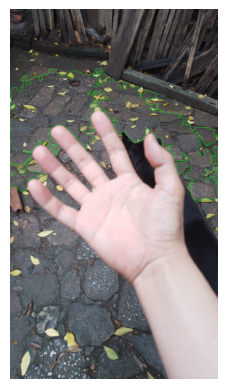

In [20]:
img = cv2.imread('hand.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.drawContours(rgb_img, [sorted_contours[0]], 0, (0,255,0), 2)
plt.imshow(rgb_img)
plt.axis('off')